In [78]:
import numpy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [79]:
df = pd.read_csv("5G_Netflix_ALL - Sheet13.csv")

In [80]:
#df.Width.replace({320:1, 384:2,640:3,736:4,1280:5,1920:6}, inplace=True)

In [81]:
df.columns

Index(['intExpID', 'Column', 'total_users', 'intSeg', 'intArr', 'intDel',
       'intSta', 'intRep', 'intDelRate', 'intActRate', 'intByteSize',
       'floatBuf', 'algorithm_used', 'Seg_Dur', 'Codec', 'Width', 'Height',
       'Resolutions', 'FPS', 'Play_Pos', 'RTT', 'Protocol', 'P1203', 'Clae',
       'Duanmu', 'Yin', 'Yu', 'intUser', 'port', 'rtt_qos', 'tp_qos', 'p_qos',
       'target'],
      dtype='object')

In [82]:
#df.columns

In [83]:
df['Column'].unique()

array([11, 10,  9,  7,  8,  2,  5,  1,  4])

In [84]:
df_10 =df[(df['intUser']==2) & (df['total_users']==2) & (df['Column']==10)]

In [85]:
df_8 =df[(df['intUser']==2)& (df['total_users']==2) & (df['Column']==8)]

In [86]:
df_10.shape[0]

420

In [87]:
col_1_df_10 = df_10[(df_10['algorithm_used']=='elastic')]
col_2_df_10 = df_10[(df_10['algorithm_used']=='arbiter')]
col_3_df_10 = df_10[(df_10['algorithm_used']=='average')]
col_4_df_10 = df_10[(df_10['algorithm_used']=='exponential')]
col_5_df_10 = df_10[(df_10['algorithm_used']=='conventional')]
col_6_df_10 = df_10[(df_10['algorithm_used']=='bba')]
col_7_df_10 = df_10[(df_10['algorithm_used']=='logistic')]

In [88]:
col_1_df_8 = df_8[(df_8['algorithm_used']=='elastic')]
col_2_df_8 = df_8[(df_8['algorithm_used']=='arbiter')]
col_3_df_8 = df_8[(df_8['algorithm_used']=='average')]
col_4_df_8 = df_8[(df_8['algorithm_used']=='exponential')]
col_5_df_8 = df_8[(df_8['algorithm_used']=='conventional')]
col_6_df_8 = df_8[(df_8['algorithm_used']=='bba')]
col_7_df_8 = df_8[(df_8['algorithm_used']=='logistic')]

Text(0.5, 1.0, 'Elastic')

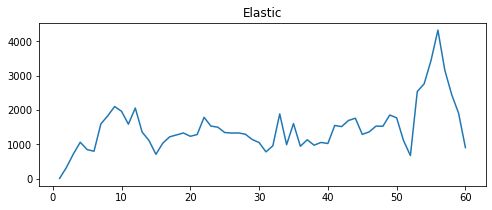

In [89]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(col_1_df_10['intSeg'], col_1_df_10['intActRate'])
ax.set_title('Elastic')

Text(0.5, 1.0, 'Arbiter')

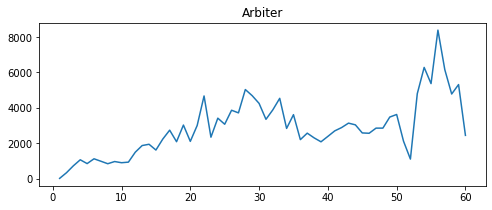

In [90]:
fig, ax = plt.subplots(figsize=(8,3))
ax.plot(col_2_df_10['intSeg'], col_2_df_10['intActRate'])
ax.set_title('Arbiter')

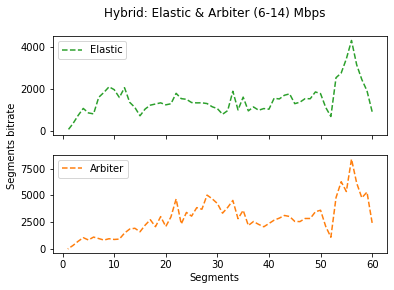

In [133]:
fig, axs = plt.subplots(2)
fig.suptitle('Hybrid: Elastic & Arbiter (6-14) Mbps')
axs[0].plot(col_1_df_10['intSeg'], col_1_df_10['intActRate'], 'tab:green' ,linestyle='--',label = 'Elastic')
axs[1].plot(col_2_df_10['intSeg'], col_2_df_10['intActRate'], 'tab:orange' ,linestyle='--', label = 'Arbiter')
for ax in axs.flat:
    ax.label_outer()
#axs[0].set(ylabel='Arbiter')
fig.text(0.5, 0.03, 'Segments', ha='center')
fig.text(0.02, 0.5, 'Segments bitrate', va='center', rotation='vertical')
axs[1].legend()
axs[0].legend()
#plt.savefig('Jason/5G_HYBRID.png', format='png')

In [134]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)


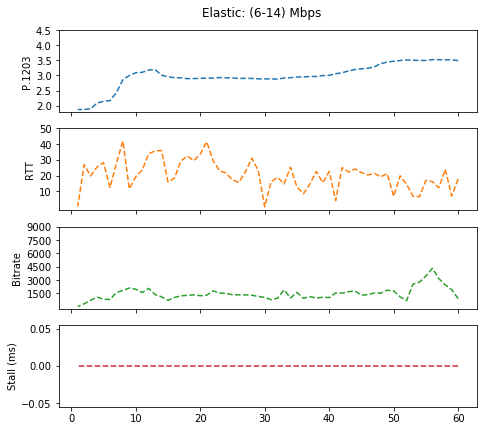

In [201]:
fig, axs = plt.subplots(4,figsize=(7.5,6.5))
fig.suptitle('Elastic: (6-14) Mbps')
axs[0].plot(col_1_df_10['intSeg'], col_1_df_10['P1203'], 'tab:blue' ,linestyle='--')
axs[1].plot(col_1_df_10['intSeg'], col_1_df_10['rtt_qos'], 'tab:orange' ,linestyle='--')

axs[2].plot(col_1_df_10['intSeg'], col_1_df_10['intActRate'], 'tab:green' ,linestyle='--')
axs[3].plot(col_1_df_10['intSeg'], col_1_df_10['intSta'], 'tab:red' ,linestyle='--')



for ax in axs.flat:
    ax.label_outer()
    
    
axs[0].set(ylabel='P.1203')
axs[0].set_yticks([2,2.5,3,3.5,4,4.5])  

axs[1].set(ylabel='RTT')
axs[1].set_yticks([10,20,30,40,50])    


  

axs[2].set(ylabel='Bitrate')
axs[2].set_yticks([1500, 3000,4500,6000,7500,9000]) 

axs[3].set(ylabel='Stall (ms)')

plt.subplots_adjust(top=0.93)
plt.savefig('Jason/D_HYBRID_ELASTIC.png', format='png')

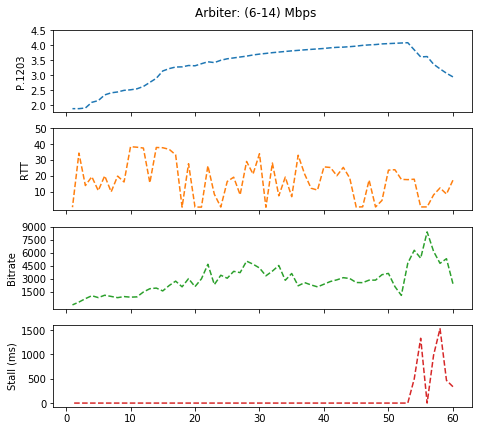

In [200]:
fig, axs = plt.subplots(4,figsize=(7.5,6.5))
fig.suptitle('Arbiter: (6-14) Mbps')
axs[0].plot(col_2_df_10['intSeg'], col_2_df_10['P1203'], 'tab:blue' ,linestyle='--')
axs[1].plot(col_2_df_10['intSeg'], col_2_df_10['rtt_qos'], 'tab:orange' ,linestyle='--')

axs[2].plot(col_2_df_10['intSeg'], col_2_df_10['intActRate'], 'tab:green' ,linestyle='--')
axs[3].plot(col_2_df_10['intSeg'], col_2_df_10['intSta'], 'tab:red' ,linestyle='--')


for ax in axs.flat:
    ax.label_outer()
    
axs[0].set(ylabel='P.1203')
axs[0].set_yticks([2,2.5,3,3.5,4,4.5])  

axs[1].set(ylabel='RTT')
axs[1].set_yticks([10,20,30,40,50])    


  

axs[2].set(ylabel='Bitrate')
axs[2].set_yticks([1500, 3000,4500,6000,7500,9000]) 


#x = [0,1000,2000]
#axs[3].set_yticks(np.arange(min(x), max(x)+50, 50.0)) 
axs[3].set(ylabel='Stall (ms)')


plt.subplots_adjust(top=0.93)
plt.savefig('Jason/D_HYBRID_ARBITER.png', format='png')

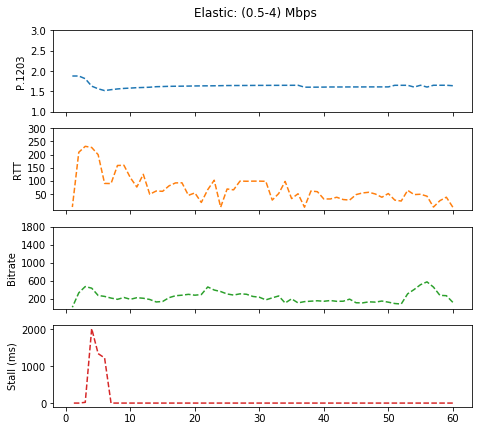

In [202]:
fig, axs = plt.subplots(4,figsize=(7.5,6.5))
fig.suptitle('Elastic: (0.5-4) Mbps')
axs[0].plot(col_1_df_8['intSeg'], col_1_df_8['P1203'], 'tab:blue' ,linestyle='--')
axs[1].plot(col_1_df_8['intSeg'], col_1_df_8['rtt_qos'], 'tab:orange' ,linestyle='--')
axs[2].plot(col_1_df_8['intSeg'], col_1_df_8['intActRate'], 'tab:green' ,linestyle='--')
axs[3].plot(col_1_df_8['intSeg'], col_1_df_8['intSta'], 'tab:red' ,linestyle='--')

for ax in axs.flat:
    ax.label_outer()
axs[0].set(ylabel='P.1203')
axs[1].set(ylabel='RTT')
axs[2].set(ylabel='Bitrate')
axs[3].set(ylabel='Stall (ms)')



axs[0].set_yticks([1,1.5, 2,2.5,3])  

axs[1].set_yticks([50,100,150,200,250,300])    

axs[2].set_yticks([200,600,1000,1400,1800])    


plt.subplots_adjust(top=0.93)
plt.savefig('Jason/D_HYBRID_ELASTIC_BAD.png', format='png')

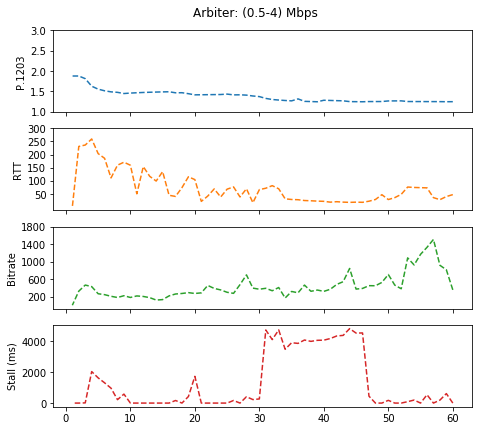

In [203]:
fig, axs = plt.subplots(4,figsize=(7.5,6.5))
fig.suptitle('Arbiter: (0.5-4) Mbps')
axs[0].plot(col_2_df_8['intSeg'], col_2_df_8['P1203'], 'tab:blue' ,linestyle='--')
axs[1].plot(col_2_df_8['intSeg'], col_2_df_8['rtt_qos'], 'tab:orange' ,linestyle='--')
axs[2].plot(col_2_df_8['intSeg'], col_2_df_8['intActRate'], 'tab:green' ,linestyle='--')
axs[3].plot(col_2_df_8['intSeg'], col_2_df_8['intSta'], 'tab:red' ,linestyle='--')

for ax in axs.flat:
    ax.label_outer()
axs[0].set(ylabel='P.1203')
axs[1].set(ylabel='RTT')
axs[2].set(ylabel='Bitrate')
axs[3].set(ylabel='Stall (ms)')


axs[0].set_yticks([1,1.5, 2,2.5,3])  

axs[1].set_yticks([50,100,150,200,250,300])    

axs[2].set_yticks([200,600,1000,1400,1800]) 


plt.subplots_adjust(top=0.93)
plt.savefig('Jason/D_HYBRID_ARBITER_BAD.png', format='png')